In [1]:

%pip install wordcloud
%pip install fileupload
%pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python 3.10.4\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python 3.10.4\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python 3.10.4\python.exe -m pip install --upgrade pip' command.
Installing C:\python 3.10.4\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\UMANG\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\UMANG\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\UMANG\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [3]:
from distutils import text_file


def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `text_file.txt` (2.01 kB)


In [4]:
def calculate_frequencies(file_contents):
   
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    

    result = {}
    a = file_contents.split()
    for word in a:
        if word in uninteresting_words:
            pass
        else:
            for letter in word:
                if letter in punctuations:
                    letter.replace(punctuations,"")
            if word not in result.keys():
                result[word]=0
            else:
                result[word]+=1
   # print(result)

    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(result)
    return cloud.to_array()
    

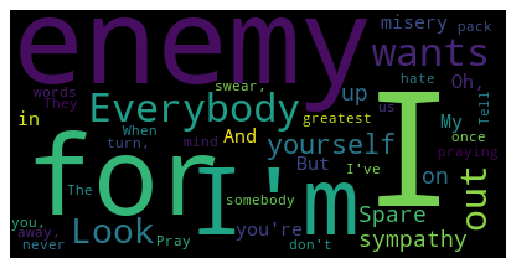

In [5]:

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()